In [1]:
!pip install pandas numpy matplotlib seaborn holidays

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import holidays
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_data(file_path):
    """
    Load the sales data from a CSV file
    """
    print("Loading data...")
    df = pd.read_csv(file_path, encoding="utf-8-sig")
    
    # Convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    print(f"Data loaded. Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    
    return df

# Add calendar-related features
def add_calendar_features(df):
    """
    Extract calendar-related features from the Date column
    """
    print("\nAdding calendar features...")
    
    # Basic date features
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter

    print("Calendar features added.")
    
    return df
# Main function to preprocess data
def preprocess_data(file_path):
    """
    Main function to preprocess the sales data
    """
    # Load data
    df = load_data(file_path)
        # Add calendar features
    df = add_calendar_features(df)
    
    return df

# Usage example
if __name__ == "__main__":
    # Replace with your actual file path
    file_path = "cleaned.csv"
    processed_df = preprocess_data(file_path)
    
    # Save the processed data
    processed_df.to_csv("step1.csv", index=False)

Loading data...
Data loaded. Shape: (15508, 5)

First 5 rows:
      Branch  Sales Excl  PAX  Qty Sold       Date
0   Bir Jdid    22088.18  680    1625.0 2023-01-01
1  Benguerir    23563.52  793    1837.0 2023-01-01
2  Oum Rabii    28051.95  798    1839.0 2023-01-01
3     Safsaf    21725.91  633    1653.0 2023-01-01
4  Exit Casa    10835.04  361    1026.0 2023-01-01

Adding calendar features...
Calendar features added.


In [4]:
import pandas as pd
import holidays

df = pd.read_csv("step1.csv", encoding="utf-8-sig")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create weekend flag
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Month start/end flags
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)

# French holidays
fr_holidays = holidays.France()
df['IsHoliday'] = df['Date'].apply(lambda x: 1 if x in fr_holidays else 0)

# Save result
df.to_csv("step2.csv", index=False)


In [5]:
import pandas as pd
import holidays
df = pd.read_csv("step2.csv", encoding="utf-8-sig")
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])
# Ramadan and Eid dates (approximate)
ramadan_eid = [
    # 2023
    ('2023-03-22', '2023-04-21', 'Ramadan'),
    ('2023-04-22', '2023-04-25', 'Eid al-Fitr'),
    ('2023-06-28', '2023-07-02', 'Eid al-Adha'),
    
    # 2024
    ('2024-03-10', '2024-04-09', 'Ramadan'),
    ('2024-04-10', '2024-04-13', 'Eid al-Fitr'),
    ('2024-06-16', '2024-06-20', 'Eid al-Adha'),
    
    # 2025
    ('2025-02-28', '2025-03-30', 'Ramadan'),
    ('2025-03-31', '2025-04-03', 'Eid al-Fitr'),
    ('2025-06-06', '2025-06-10', 'Eid al-Adha'),
]

# Create columns for Ramadan and Eid
df['IsRamadan'] = 0
df['IsEid'] = 0

for start_date, end_date, event_type in ramadan_eid:
    mask = (df['Date'] >= pd.to_datetime(start_date)) & (df['Date'] <= pd.to_datetime(end_date))
    if event_type == 'Ramadan':
        df.loc[mask, 'IsRamadan'] = 1
    else:  # Eid
        df.loc[mask, 'IsEid'] = 1

# Add days since start of data
min_date = df['Date'].min()
df['DaysSinceStart'] = (df['Date'] - min_date).dt.days

# Add day of month
df['DayOfMonth'] = df['Date'].dt.day
df.to_csv("step3.csv", index=False)
print("Calendar features added.")

Calendar features added.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import holidays
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("step3.csv", encoding="utf-8-sig")

# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

school_vacations = [
    # 2022-2023 Academic Year
    ('2023-01-01', '2023-01-01'),  # New Year (فاتح يناير)
    ('2023-01-11', '2023-01-11'),  # January break (single day)
    ('2023-01-22', '2023-01-29'),  # January-February break
    ('2023-03-12', '2023-03-19'),  # March break
    ('2023-04-29', '2023-05-02'),  # Ramadan to Eid (29 رمضان إلى 2 شوال 1444)
    ('2023-05-01', '2023-05-01'),  # Labor Day (فاتح ماي)
    ('2023-04-30', '2023-05-07'),  # May break
    
    # 2023-2024 Academic Year
    ('2023-10-15', '2023-10-22'),  # October break
    ('2023-11-06', '2023-11-06'),  # November break (single day)
    ('2023-11-18', '2023-11-18'),  # November break (single day)
    ('2023-12-03', '2023-12-10'),  # December break
    ('2024-01-01', '2024-01-01'),  # New Year (فاتح يناير)
    ('2024-01-11', '2024-01-11'),  # January break (single day)
    ('2024-01-21', '2024-01-28'),  # January-February break
    ('2024-03-10', '2024-03-17'),  # March break
    ('2024-04-28', '2024-05-02'),  # Ramadan to Eid (29 رمضان إلى 2 شوال 1445)
    ('2024-04-28', '2024-05-05'),  # May break
    
    # 2024-2025 Academic Year
    ('2024-10-20', '2024-10-27'),  # October break
    ('2024-11-06', '2024-11-06'),  # November break (single day)
    ('2024-11-18', '2024-11-18'),  # November break (single day)
    ('2024-12-08', '2024-12-15'),  # December break
    ('2025-01-01', '2025-01-01'),  # New Year (فاتح يناير)
    ('2025-01-11', '2025-01-11'),  # January break (single day)
    ('2025-01-14', '2025-01-14'),  # January break (single day)
    ('2025-01-26', '2025-02-02'),  # January-February break
    ('2025-03-16', '2025-03-23'),  # March break
    ('2025-03-29', '2025-04-02'),  # Ramadan to Eid (29 رمضان إلى 2 شوال 1446)
    ('2025-05-01', '2025-05-01'),  # Labor Day (فاتح ماي)
    ('2025-05-04', '2025-05-11')   # May break
]

def is_school_vacation(date):
    for start_date, end_date in school_vacations:
        if pd.to_datetime(start_date) <= date <= pd.to_datetime(end_date):
            return 1
    return 0

df['IsSchoolVacation'] = df['Date'].apply(is_school_vacation)
df.to_csv("step4.csv", index=False)

In [28]:
import pandas as pd

# 1. Load your dataset
df = pd.read_csv("step4.csv", encoding="utf-8-sig")
# 2. Rename branches (before merging coordinates)
df["Branch"] = df["Branch"].replace({
    "Exit 2": "Exit Casa",
    "Al Jazira New": "Al Jazira"
})
# 2. Define branch coordinates (matching your data)
branch_coords = {
    "Branch": [
        "Mellousa", "Laayoune ", "Safsaf", "Lafayette", "Fes ", 
        "Tahla", "Al Jazira", "Grande Route", "Doumer", "Manar",
        "El Menzeh", "Exit Casa", "Bir Jdid", "Benguerir", "Oum Rabii",
        "Amskroud", "Benguerir2", "Shell Select Etoile"

    ],
    "Latitude": [
        35.68782, 34.616475, 34.2281089, 33.897786, 33.9382,
        34.1053484, 33.779558, 33.600988, 33.586734, 33.577723,
        33.591106, 33.506586, 33.353765, 32.273826, 32.89411,
        30.531533, 32.273826,33.6169325
    ],
    "Longitude": [
        -5.679123, -2.43824, -6.5808433, -5.53623, -4.8982069,
        -4.4538939, -7.232679, -7.514439, -7.64922, -7.637705,
        -7.657339, -7.630001, -7.978263, -7.969508, -7.669101,
        -9.330139, -7.968508, -7.4766302
    ]
}

# 3. Convert to DataFrame
coords_df = pd.DataFrame(branch_coords)

# 4. Merge with your main dataset (on 'Branch' column)
df = pd.merge(df, coords_df, on="Branch", how="left")

# 5. Verify the merge
print(df[["Branch", "Latitude", "Longitude"]].head())

# 6. Save the updated dataset
df.to_csv("step4lati.csv", index=False, encoding="utf-8-sig")

      Branch   Latitude  Longitude
0   Bir Jdid  33.353765  -7.978263
1  Benguerir  32.273826  -7.969508
2  Oum Rabii  32.894110  -7.669101
3     Safsaf  34.228109  -6.580843
4  Exit Casa  33.506586  -7.630001


In [29]:
import pandas as pd
import requests
from tqdm import tqdm  # For progress tracking

# 1. Load your dataset (with coordinates)
df = pd.read_csv("step4lati.csv", encoding="utf-8-sig")
df['Date'] = pd.to_datetime(df['Date'])

# 2. Define function to fetch weather data for a single location
def fetch_weather_data(start_date, end_date, lat, lon):
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m,precipitation"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise error for bad status
        data = response.json()
        
        # Convert to DataFrame
        weather_df = pd.DataFrame({
            "Date": pd.to_datetime(data["hourly"]["time"]),
            "Temperature": data["hourly"]["temperature_2m"],
            "Precipitation": data["hourly"]["precipitation"]
        })
        
        # Aggregate to daily averages
        weather_df['Date'] = weather_df['Date'].dt.date
        weather_df = weather_df.groupby('Date').mean().reset_index()
        weather_df['Date'] = pd.to_datetime(weather_df['Date'])
        
        return weather_df
    
    except Exception as e:
        print(f"Failed for lat={lat}, lon={lon}: {str(e)}")
        return None

# 3. Fetch weather for each unique branch location
all_weather_dfs = []
unique_branches = df[['Branch', 'Latitude', 'Longitude']].drop_duplicates()

for _, row in tqdm(unique_branches.iterrows(), total=len(unique_branches)):
    branch = row['Branch']
    lat = row['Latitude']
    lon = row['Longitude']
    
    # Get date range for this branch (optimization)
    branch_dates = df[df['Branch'] == branch]['Date']
    start_date = branch_dates.min().strftime('%Y-%m-%d')
    end_date = branch_dates.max().strftime('%Y-%m-%d')
    
    weather_df = fetch_weather_data(start_date, end_date, lat, lon)
    if weather_df is not None:
        weather_df['Branch'] = branch  # Tag data with branch name
        all_weather_dfs.append(weather_df)

# 4. Combine all weather data
combined_weather = pd.concat(all_weather_dfs)

# 5. Merge with main dataset
df = pd.merge(df, combined_weather, on=['Branch', 'Date'], how='left')

# 6. Add ExtremeWeather flag
df['ExtremeWeather'] = ((df['Temperature'] > 30) | 
                       (df['Temperature'] < 0) | 
                       (df['Precipitation'] > 10)).astype(int)

# 7. Save
df.to_csv("step5.csv", index=False, encoding="utf-8-sig")
print("Real weather data added and saved!")

100%|██████████| 18/18 [00:21<00:00,  1.19s/it]


Real weather data added and saved!


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("step5.csv", encoding="utf-8-sig")

# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add payday indicator (15th and end of month)
df['IsPayday'] = ((df['Date'].dt.day == 15) | (df['Date'].dt.is_month_end)).astype(int)

# Save result
df.to_csv("step6.csv", index=False)
print("IsPayday added.")



Adding economic features (placeholder)...
Economic features added.


In [ ]:
import pandas as pd

# Load the CSV (replace 'input.csv' with your actual file)
df = pd.read_csv("step7.csv", encoding="utf-8-sig")


# 1. Remove completely empty rows and columns
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# 2. Drop the unwanted columns
columns_to_drop = [
   'PAX','Qty Sold','Date','DayOfMonth','Latitude','Longitude'
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Save the cleaned data
df.to_csv('step8.csv', index=False)


In [ ]:
import pandas as pd

df = pd.read_csv("step7.csv", encoding="utf-8-sig")

# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

print("\nAdding marketing features (placeholder)...")

# Initialize marketing-related columns
df['HasPromotion'] = 0
df['MarketingCampaign'] = 0
df['ProductLaunch'] = 0

# Define promotions
promotions = [
    ('2023-01-10', '2023-01-20'),
    ('2023-03-15', '2023-03-30'),
    ('2023-06-01', '2023-06-15'),
    ('2023-09-10', '2023-09-25'),
    ('2023-11-25', '2023-12-31'),
    ('2024-01-10', '2024-01-20'),
    ('2024-03-15', '2024-03-30'),
    ('2024-06-01', '2024-06-15'),
    ('2024-09-10', '2024-09-25'),
    ('2024-11-25', '2024-12-31'),
    ('2025-01-10', '2025-01-20'),
    ('2025-03-15', '2025-03-30'),
]
 
# Define campaigns
campaigns = [
    ('2023-02-01', '2023-02-28'),
    ('2023-05-15', '2023-06-15'),
    ('2023-10-01', '2023-10-31'),
    ('2024-02-01', '2024-02-29'),
    ('2024-05-15', '2024-06-15'),
    ('2024-10-01', '2024-10-31'),
    ('2025-02-01', '2025-02-28'),
]

# Define product launches
product_launches = [
    '2023-04-15', '2023-08-10', '2024-01-05',
    '2024-04-15', '2024-08-10', '2025-01-05', '2025-04-15',
]

# Apply promotions
for start, end in promotions:
    mask = (df['Date'] >= pd.to_datetime(start)) & (df['Date'] <= pd.to_datetime(end))
    df.loc[mask, 'HasPromotion'] = 1

# Apply marketing campaigns
for start, end in campaigns:
    mask = (df['Date'] >= pd.to_datetime(start)) & (df['Date'] <= pd.to_datetime(end))
    df.loc[mask, 'MarketingCampaign'] = 1

# Apply product launches (for a week)
for date in product_launches:
    start = pd.to_datetime(date)
    end = start + pd.Timedelta(days=7)
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    df.loc[mask, 'ProductLaunch'] = 1

# Save result
df.to_csv("step8.csv", index=False)
print("Marketing features added.")



Random Forest Performance:
MAE: 5518.73
MSE: 78755496.02
RMSE: 8874.43
R²: 0.6529


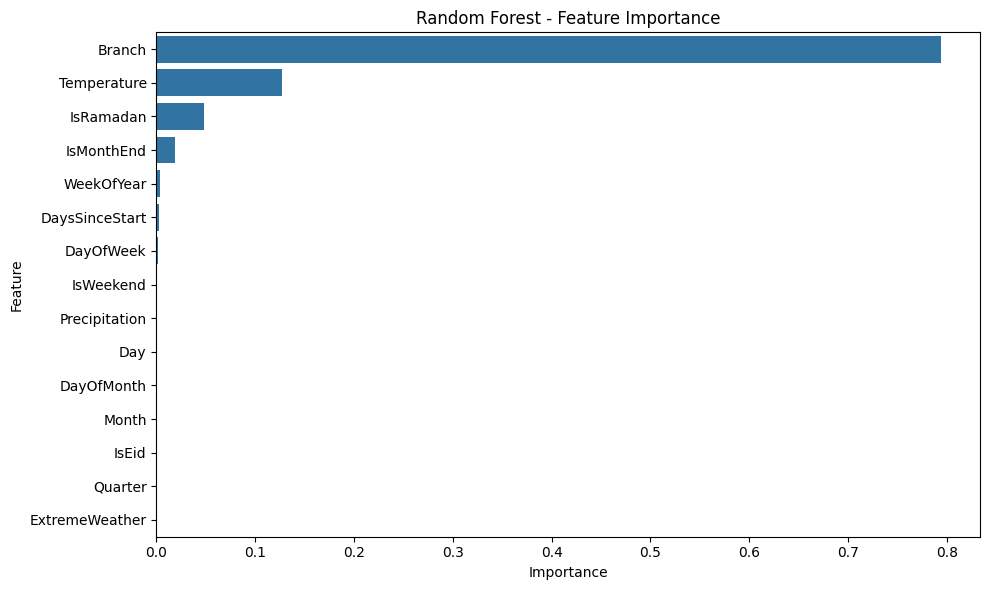

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 12392, number of used features: 20
[LightGBM] [Info] Start training from score 19787.005124
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

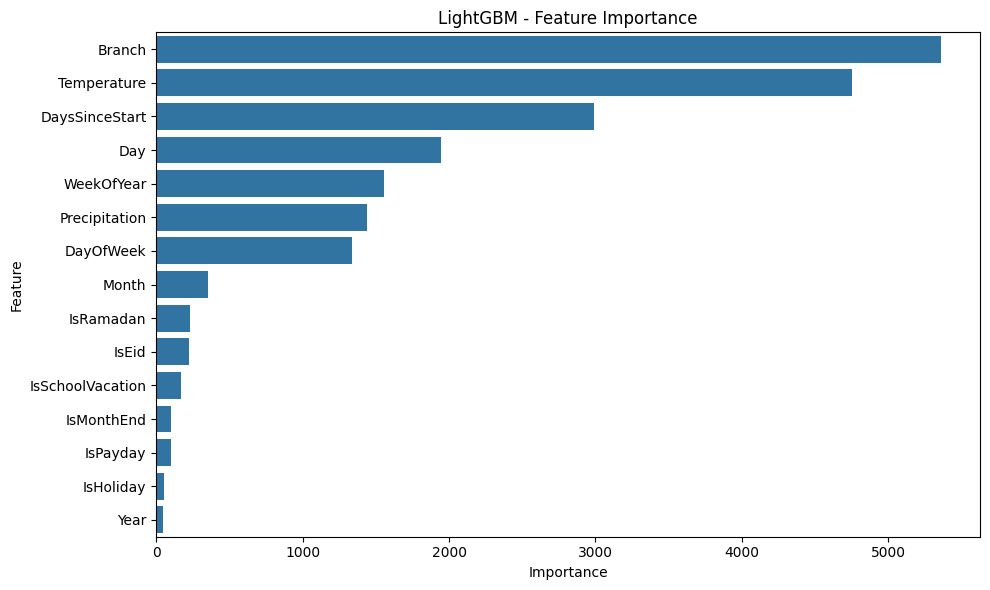


XGBoost Performance:
MAE: 7714.17
MSE: 249940821.15
RMSE: 15809.52
R²: -0.1016


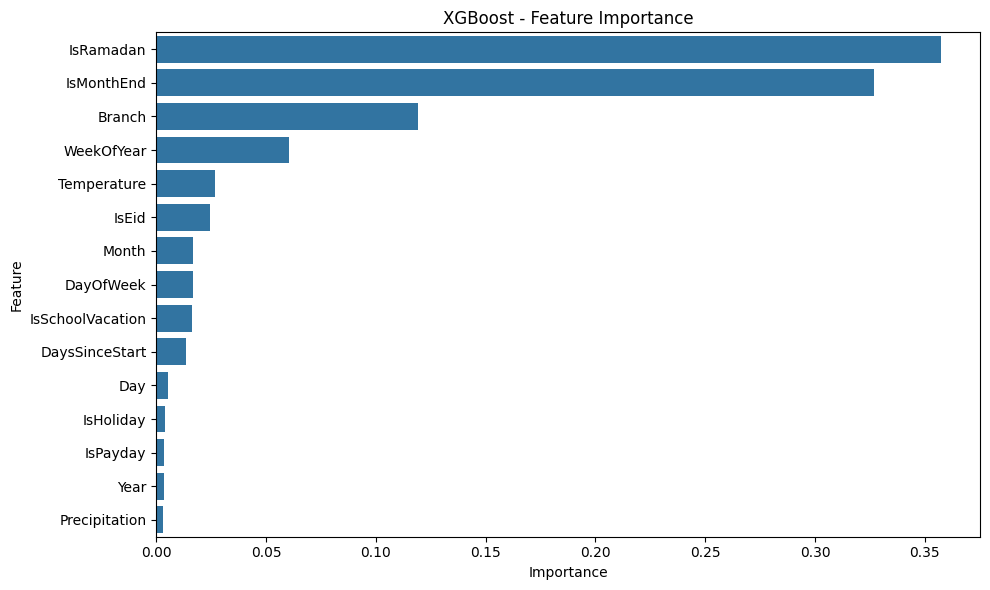


Model Comparison:
                       MAE           MSE          RMSE        R2
Random Forest  5518.733923  7.875550e+07   8874.429335  0.652900
LightGBM       5628.485218  7.027277e+07   8382.885291  0.690286
XGBoost        7714.174557  2.499408e+08  15809.516791 -0.101566

Models and label encoder saved successfully!


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
df = pd.read_csv("step7.csv", encoding="utf-8-sig")

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Data Preparation
def prepare_data(df):
    # Encode categorical variables
    le = LabelEncoder()
    df['Branch'] = le.fit_transform(df['Branch'])
    
    # Define features and target
    features = [
        'Branch', 'Year', 'Month', 'Day', 
        'DayOfWeek', 'WeekOfYear', 'Quarter', 'IsWeekend', 
        'IsMonthStart', 'IsMonthEnd', 'IsHoliday', 'IsRamadan', 
        'IsEid', 'DaysSinceStart', 'DayOfMonth', 'IsSchoolVacation', 'Temperature', 'Precipitation',
        'ExtremeWeather', 'IsPayday'
    ]
    
    target = 'Sales Excl'
    
    X = df[features]
    y = df[target]
    
    return X, y, le

# Split data into train and test sets
def split_data(X, y):
    # Split into train (80%) and test (20%)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=False
    )
    
    return X_train, X_test, y_train, y_test

# Model Training and Evaluation
def train_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    
    # Feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
        plt.title(f'{model_name} - Feature Importance')
        plt.tight_layout()
        plt.show()
    
    return model, y_pred, {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Main function
def main():
    # Prepare data
    X, y, label_encoder = prepare_data(df)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(
            n_estimators=1000, 
            random_state=42,
            max_depth=5,
            min_samples_split=5,
            n_jobs=-1
        ),
        'LightGBM': lgb.LGBMRegressor(
            n_estimators=1000,
            learning_rate=0.09,
            max_depth=5,
            random_state=42,
            n_jobs=-1
        ),
        'XGBoost': xgb.XGBRegressor(
            n_estimators=700,
            learning_rate=0.09,
            max_depth=7,
            random_state=42,
            n_jobs=-1
        )
    }
    
    # Train and evaluate models
    results = {}
    trained_models = {}
    
    for name, model in models.items():
        trained_model, y_pred, metrics = train_evaluate_model(
            model, name, X_train, X_test, y_train, y_test
        )
        trained_models[name] = trained_model
        results[name] = metrics
    
    # Compare models
    print("\nModel Comparison:")
    comparison_df = pd.DataFrame(results).T
    print(comparison_df)
    
    # Save models and label encoder
    joblib.dump(trained_models['Random Forest'], 'random_forest_model.pkl')
    joblib.dump(trained_models['LightGBM'], 'lightgbm_model.pkl')
    joblib.dump(trained_models['XGBoost'], 'xgboost_model.pkl')
    joblib.dump(label_encoder, 'label_encoder.pkl')
    
    print("\nModels and label encoder saved successfully!")

if __name__ == "__main__":
    main()

In [8]:
import joblib
import pandas as pd
from datetime import datetime

def predict_sales(branch, date, temperature, precipitation, is_holiday=0, is_ramadan=0, is_eid=0, is_school_vacation=0):
    """
    Predict sales for a given branch and date using all three models
    
    Parameters:
    - branch: str (Branch name)
    - date: str (YYYY-MM-DD format)
    - temperature: float (in Celsius)
    - precipitation: float (in mm)
    - is_holiday: int (0 or 1)
    - is_ramadan: int (0 or 1)
    - is_eid: int (0 or 1)
    - is_school_vacation: int (0 or 1)
    
    Returns:
    - Dictionary with predictions from all models
    """
    # Load the saved models and encoder
    rf_model = joblib.load('random_forest_model.pkl')
    lgb_model = joblib.load('lightgbm_model.pkl')
    xgb_model = joblib.load('xgboost_model.pkl')
    label_encoder = joblib.load('label_encoder.pkl')
    
    # Convert date to datetime object
    date_dt = datetime.strptime(date, '%Y-%m-%d')
    
    # Calculate date features
    day_of_week = date_dt.weekday()  # Monday=0, Sunday=6
    week_of_year = date_dt.isocalendar()[1]
    quarter = (date_dt.month - 1) // 3 + 1
    is_weekend = 1 if day_of_week >= 5 else 0
    is_month_start = 1 if date_dt.day == 1 else 0
    
    # Correct way to check for month end
    next_day = date_dt + pd.Timedelta(days=1)
    is_month_end = 1 if next_day.month != date_dt.month else 0
    
    # Days since start (you need to know your training data start date)
    # For example, if your training data started at '2023-01-01':
    days_since_start = (date_dt - datetime(2023, 1, 1)).days
    
    # Is payday (15th or end of month)
    is_payday = 1 if (date_dt.day == 15) or is_month_end else 0
    
    # Extreme weather flag
    extreme_weather = 1 if (temperature > 30) or (temperature < 0) or (precipitation > 10) else 0
    
    # Prepare new data
    new_data = pd.DataFrame({
        'Branch': [branch],
        'Year': [date_dt.year],
        'Month': [date_dt.month],
        'Day': [date_dt.day],
        'DayOfWeek': [day_of_week],
        'WeekOfYear': [week_of_year],
        'Quarter': [quarter],
        'IsWeekend': [is_weekend],
        'IsMonthStart': [is_month_start],
        'IsMonthEnd': [is_month_end],
        'IsHoliday': [is_holiday],
        'IsRamadan': [is_ramadan],
        'IsEid': [is_eid],
        'DaysSinceStart': [days_since_start],
        'DayOfMonth': [date_dt.day],
        'IsSchoolVacation': [is_school_vacation],
        'Temperature': [temperature],
        'Precipitation': [precipitation],
        'ExtremeWeather': [extreme_weather],
        'IsPayday': [is_payday]
    })
    
    # Encode branch
    new_data['Branch'] = label_encoder.transform(new_data['Branch'])
    
    # Make predictions
    rf_pred = rf_model.predict(new_data)
    lgb_pred = lgb_model.predict(new_data)
    xgb_pred = xgb_model.predict(new_data)
    
    return {
        'Random Forest': round(float(rf_pred[0]), 2),
        'LightGBM': round(float(lgb_pred[0]), 2),
        'XGBoost': round(float(xgb_pred[0]), 2),
        'Average': round(float((rf_pred[0] + lgb_pred[0] + xgb_pred[0]) / 3), 2)
    }

# Example usage
if __name__ == "__main__":
    # Example prediction for Bir Jdid on 2024-01-15
    prediction = predict_sales(
        branch='Bir Jdid',
        date='2025-05-12',
        temperature=16.40,
        precipitation=0.00,
        is_holiday=0,
        is_ramadan=0,
        is_eid=0,
        is_school_vacation=1
    )
    
    print("\nSales Predictions:")
    print(f"Random Forest: {prediction['Random Forest']}")
    print(f"LightGBM: {prediction['LightGBM']}")
    print(f"XGBoost: {prediction['XGBoost']}")
    print(f"Average Prediction: {prediction['Average']}")


Sales Predictions:
Random Forest: 27821.83
LightGBM: 38960.57
XGBoost: 38185.42
Average Prediction: 34989.27


✅ Données de l'année 2024 exportées avec succès dans 'donnees_2024.csv'


In [37]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as XGBRegressor
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("step6.csv", encoding="utf-8-sig")



# Print basic information about the dataset
print("Dataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumns:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Sales Excl' to numeric if needed
df['Sales Excl'] = pd.to_numeric(df['Sales Excl'], errors='coerce')

# Basic data exploration
print("\nBasic Statistics:")
print(df.describe().T)

# Check for duplicates
print(f"\nNumber of duplicates: {df.duplicated().sum()}")



Dataset Overview:
Number of rows: 15508
Number of columns: 26

Columns:
['Branch', 'Sales Excl', 'PAX', 'Qty Sold', 'Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'IsHoliday', 'IsRamadan', 'IsEid', 'DaysSinceStart', 'DayOfMonth', 'IsSchoolVacation', 'Latitude', 'Longitude', 'Temperature', 'Precipitation', 'ExtremeWeather', 'IsPayday']

Missing Values:
Branch              0
Sales Excl          0
PAX                 0
Qty Sold            0
Date                0
Year                0
Month               0
Day                 0
DayOfWeek           0
WeekOfYear          0
Quarter             0
IsWeekend           0
IsMonthStart        0
IsMonthEnd          0
IsHoliday           0
IsRamadan           0
IsEid               0
DaysSinceStart      0
DayOfMonth          0
IsSchoolVacation    0
Latitude            0
Longitude           0
Temperature         0
Precipitation       0
ExtremeWeather      0
IsPayday            0
dtype: i

In [41]:
# Data Cleaning and Preprocessing
# Handle missing values for numeric columns
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('Sales Excl')  # Remove the target variable
numeric_features.remove('PAX')
numeric_features.remove('Qty Sold')
numeric_features.remove('Longitude')
numeric_features.remove('Latitude')

# Handle missing values for categorical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.append('Branch')  # Add Branch as a categorical feature

# Print features
print("\nNumeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'Quarter', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'IsHoliday', 'IsRamadan', 'IsEid', 'DaysSinceStart', 'DayOfMonth', 'IsSchoolVacation', 'Temperature', 'Precipitation', 'ExtremeWeather', 'IsPayday']
Categorical Features: ['Branch', 'Branch']


In [42]:
# Prepare the data for modeling
X = df.drop('Sales Excl', axis=1)
y = df['Sales Excl']

# Remove Date column for modeling
X = X.drop('Date', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [43]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Helper function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Create a list to store model performance
models_performance = []

# Placeholder for preprocessed data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Print data shapes after preprocessing
print(f"\nProcessed training data shape: {X_train_processed.shape}")
print(f"Processed test data shape: {X_test_processed.shape}")



Processed training data shape: (12406, 55)
Processed test data shape: (3102, 55)


In [44]:

# 1. Linear Regression
print("\n" + "=" * 50)
print("1. Linear Regression")
print("=" * 50)

lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)
lr_pred = lr_model.predict(X_test_processed)
lr_metrics = evaluate_model(y_test, lr_pred, "Linear Regression")
models_performance.append(lr_metrics)



1. Linear Regression

Linear Regression Performance Metrics:
Mean Squared Error (MSE): 88552483.10
Root Mean Squared Error (RMSE): 9410.23
Mean Absolute Error (MAE): 5878.19
R² Score: 0.6786


In [45]:
# 2. Ridge Regression
print("\n" + "=" * 50)
print("2. Ridge Regression")
print("=" * 50)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_processed, y_train)
ridge_pred = ridge_model.predict(X_test_processed)
ridge_metrics = evaluate_model(y_test, ridge_pred, "Ridge Regression")
models_performance.append(ridge_metrics)


2. Ridge Regression

Ridge Regression Performance Metrics:
Mean Squared Error (MSE): 88769213.42
Root Mean Squared Error (RMSE): 9421.74
Mean Absolute Error (MAE): 5903.79
R² Score: 0.6778


In [46]:
# 3. Random Forest
print("\n" + "=" * 50)
print("3. Random Forest")
print("=" * 50)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
rf_pred = rf_model.predict(X_test_processed)
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")
models_performance.append(rf_metrics)


3. Random Forest

Random Forest Performance Metrics:
Mean Squared Error (MSE): 47070840.94
Root Mean Squared Error (RMSE): 6860.82
Mean Absolute Error (MAE): 3434.44
R² Score: 0.8292


In [47]:
# 4. XGBoost
print("\n" + "=" * 50)
print("4. XGBoost")
print("=" * 50)

xgb_model = XGBRegressor.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_processed, y_train)
xgb_pred = xgb_model.predict(X_test_processed)
xgb_metrics = evaluate_model(y_test, xgb_pred, "XGBoost")
models_performance.append(xgb_metrics)


4. XGBoost

XGBoost Performance Metrics:
Mean Squared Error (MSE): 40208970.53
Root Mean Squared Error (RMSE): 6341.05
Mean Absolute Error (MAE): 3329.78
R² Score: 0.8541


In [48]:
# 5. LightGBM
print("\n" + "=" * 50)
print("5. LightGBM")
print("=" * 50)

lgbm_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train_processed, y_train)
lgbm_pred = lgbm_model.predict(X_test_processed)
lgbm_metrics = evaluate_model(y_test, lgbm_pred, "LightGBM")
models_performance.append(lgbm_metrics)


5. LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 998
[LightGBM] [Info] Number of data points in the train set: 12406, number of used features: 55
[LightGBM] [Info] Start training from score 19513.550708

LightGBM Performance Metrics:
Mean Squared Error (MSE): 40600795.98
Root Mean Squared Error (RMSE): 6371.88
Mean Absolute Error (MAE): 3297.22
R² Score: 0.8526


In [49]:
# 6. Gradient Boosting
print("\n" + "=" * 50)
print("6. Gradient Boosting")
print("=" * 50)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_processed, y_train)
gb_pred = gb_model.predict(X_test_processed)
gb_metrics = evaluate_model(y_test, gb_pred, "Gradient Boosting")
models_performance.append(gb_metrics)


6. Gradient Boosting

Gradient Boosting Performance Metrics:
Mean Squared Error (MSE): 59344419.33
Root Mean Squared Error (RMSE): 7703.53
Mean Absolute Error (MAE): 4518.77
R² Score: 0.7846


In [50]:
# 7. Support Vector Machine
print("\n" + "=" * 50)
print("7. Support Vector Machine")
print("=" * 50)

# SVM can be slow for large datasets, so we'll use a smaller subset for this demo
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_processed, y_train)
svr_pred = svr_model.predict(X_test_processed)
svr_metrics = evaluate_model(y_test, svr_pred, "Support Vector Machine")
models_performance.append(svr_metrics)


7. Support Vector Machine

Support Vector Machine Performance Metrics:
Mean Squared Error (MSE): 293281617.75
Root Mean Squared Error (RMSE): 17125.47
Mean Absolute Error (MAE): 11276.12
R² Score: -0.0644



Model Comparison:
                    Model           MSE          RMSE           MAE        R2
3                 XGBoost  4.020897e+07   6341.054370   3329.777051  0.854066
4                LightGBM  4.060080e+07   6371.875390   3297.218995  0.852644
2           Random Forest  4.707084e+07   6860.819262   3434.439343  0.829162
5       Gradient Boosting  5.934442e+07   7703.532912   4518.772795  0.784616
0       Linear Regression  8.855248e+07   9410.232893   5878.186826  0.678609
1        Ridge Regression  8.876921e+07   9421.741528   5903.791172  0.677822
6  Support Vector Machine  2.932816e+08  17125.466935  11276.115215 -0.064432


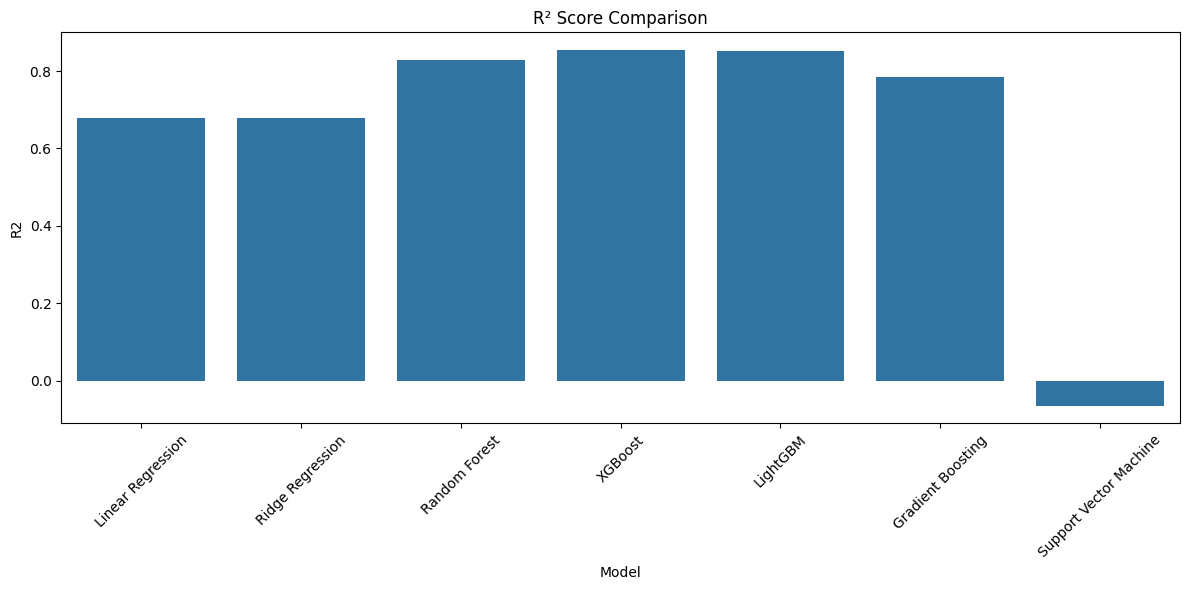

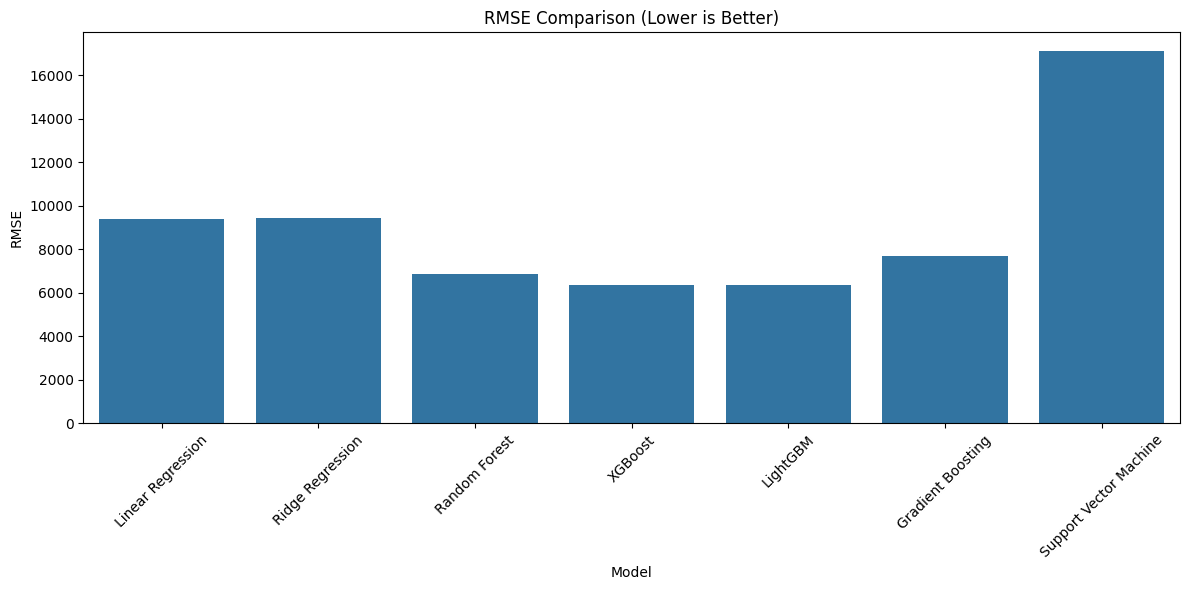

In [52]:
# Create a DataFrame to compare all models
comparison_df = pd.DataFrame(models_performance)
print("\nModel Comparison:")
print(comparison_df.sort_values('R2', ascending=False))

# Visualize model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=comparison_df)
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=comparison_df)
plt.title('RMSE Comparison (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

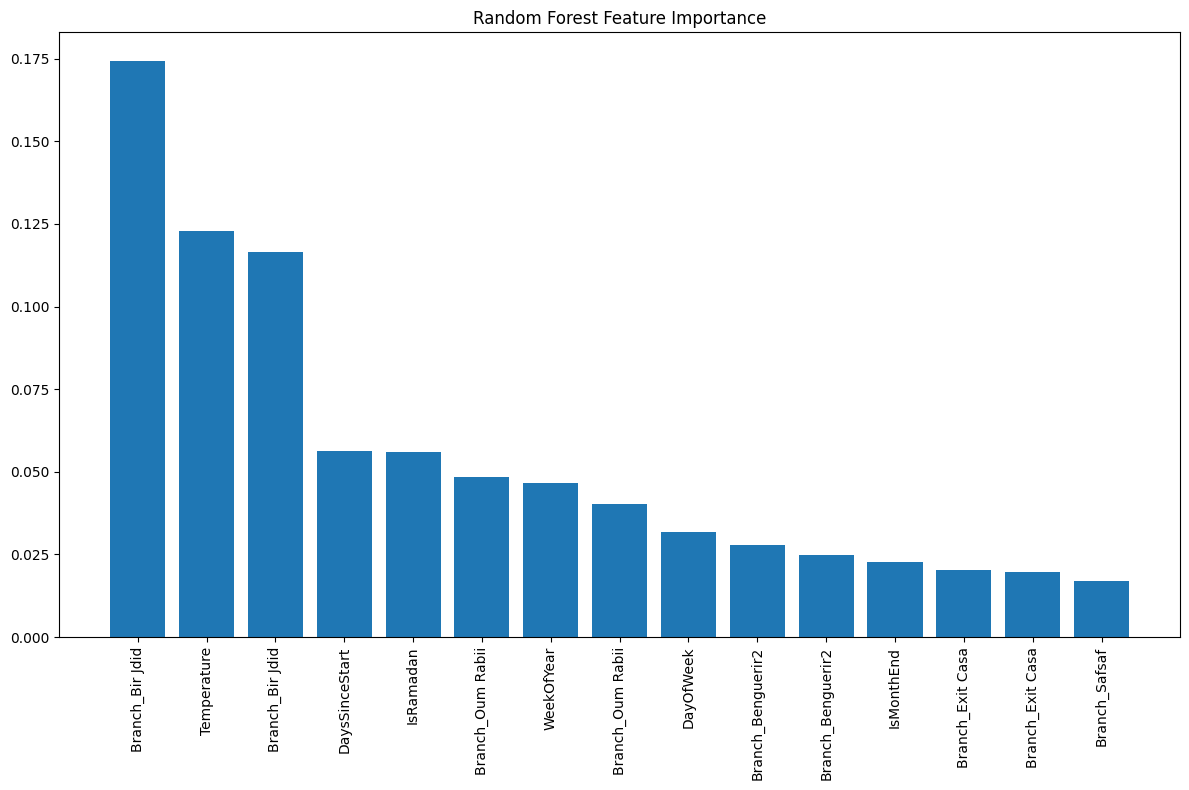


Best performing model: XGBoost


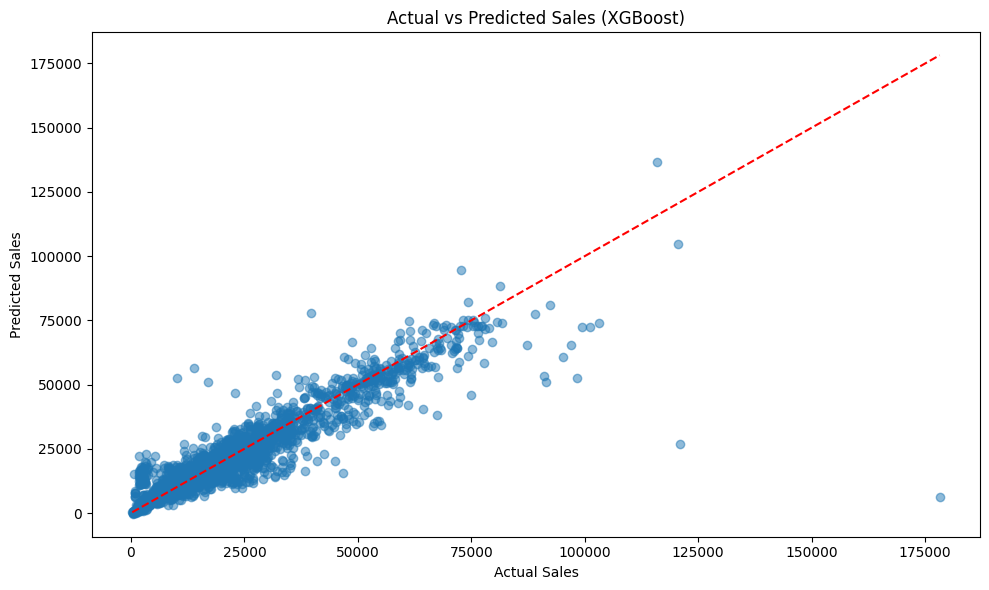

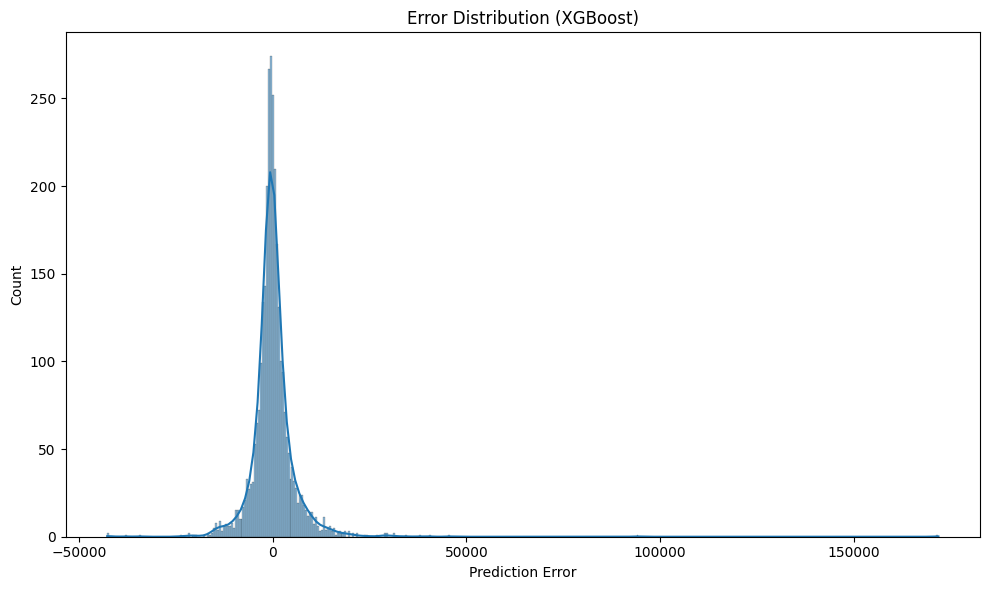


Analysis Complete!


In [53]:
#Feature importance for the best model (assuming Random Forest performs well)
if 'Random Forest' in comparison_df['Model'].values:
    # Get feature names after preprocessing
    feature_names = []
    # Add numeric feature names
    feature_names.extend(numeric_features)
    # Add one-hot encoded categorical feature names
    for cat in categorical_features:
        if cat in X.columns:
            categories = X[cat].unique()
            for category in categories:
                feature_names.append(f"{cat}_{category}")
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Keep only the top 15 features for better visualization
    top_n = min(15, len(feature_names))
    
    plt.title('Random Forest Feature Importance')
    plt.bar(range(top_n), importances[indices][:top_n], align='center')
    plt.xticks(range(top_n), [feature_names[i] if i < len(feature_names) else f"Feature {i}" for i in indices[:top_n]], rotation=90)
    plt.tight_layout()
    plt.show()

# Actual vs Predicted plot for the best model
best_model_name = comparison_df.iloc[comparison_df['R2'].idxmax()]['Model']
print(f"\nBest performing model: {best_model_name}")

# Get predictions for the best model
if best_model_name == "Linear Regression":
    best_pred = lr_pred
elif best_model_name == "Ridge Regression":
    best_pred = ridge_pred
elif best_model_name == "Random Forest":
    best_pred = rf_pred
elif best_model_name == "XGBoost":
    best_pred = xgb_pred
elif best_model_name == "LightGBM":
    best_pred = lgbm_pred
elif best_model_name == "Gradient Boosting":
    best_pred = gb_pred
else:
    best_pred = svr_pred

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'Actual vs Predicted Sales ({best_model_name})')
plt.tight_layout()
plt.show()

# Error distribution
errors = y_test - best_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title(f'Error Distribution ({best_model_name})')
plt.tight_layout()
plt.show()

print("\nAnalysis Complete!")

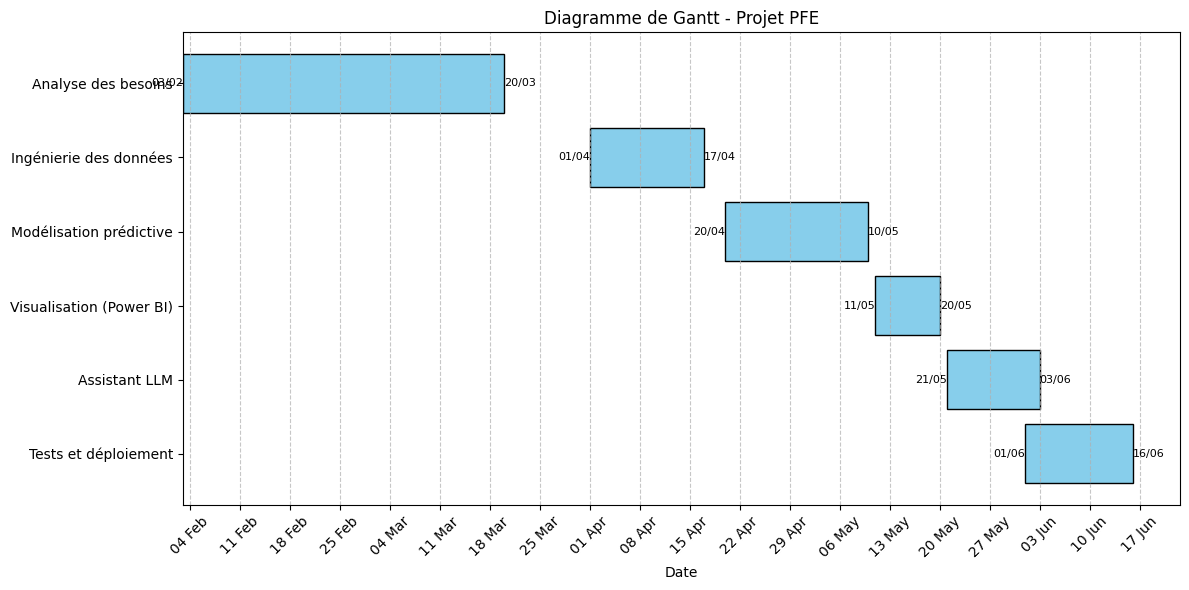

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

# Data
data = {
    "Tâche": [
        "Analyse des besoins",
        "Ingénierie des données",
        "Modélisation prédictive",
        "Visualisation (Power BI)",
        "Assistant LLM",
        "Tests et déploiement"
    ],
    "Début": [
        "2025-02-03",
        "2025-04-01",
        "2025-04-20",
        "2025-05-11",
        "2025-05-21",
        "2025-06-01"
    ],
    "Fin": [
        "2025-03-20",
        "2025-04-17",
        "2025-05-10",
        "2025-05-20",
        "2025-06-03",
        "2025-06-16"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df["Début"] = pd.to_datetime(df["Début"])
df["Fin"] = pd.to_datetime(df["Fin"])
df["Durée"] = df["Fin"] - df["Début"]

# Reverse the order to have the first task at the top
df = df[::-1].reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for i, row in df.iterrows():
    ax.barh(row["Tâche"], row["Durée"].days, left=row["Début"], color="skyblue", edgecolor="black")
    ax.text(row["Début"], i, row["Début"].strftime('%d/%m'), va='center', ha='right', fontsize=8, color='black')
    ax.text(row["Fin"], i, row["Fin"].strftime('%d/%m'), va='center', ha='left', fontsize=8, color='black')

# Formatting
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.title("Diagramme de Gantt - Projet PFE")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()
